![Students](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/5107/2020/08/16232334/people-2562626_1920.jpg)

# Guided Project: 

## Visualizing Earnings Based On College Majors

In this course, we've been creating plots using **pyplot** and **matplotlib** directly. 

When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. 

Thankfully, **pandas** has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. 

This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects. 

**In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.**


Trabajaremos con un conjunto de datos sobre: 

- We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on:

- **Gender diversity**.

- **Employment rates**.

- **Median salaries, and more**. 


Here are some of the columns in the dataset:

- `Rank` - *Rank by median earnings (the dataset is ordered by this column)*.

- `Major_code` - *Major code*.

- `Major` - *Major description*.

- `Major_category` - *Category of major.*

- `Total` - *Total number of people with major.*

- `Sample_size` - *Sample size (unweighted) of full-time.*

- `Men` - *Male graduates.*

- `Women` - *Female graduates.*

- `ShareWomen` - *Women as share of total.*

- `Employed` - *Number employed.*

- `Unemployment_rate` - Percentage of the work force that is unemployed at any given date

- `Median` - *Median salary of full-time, year-round workers.*

- `Low_wage_jobs` - *Number in low-wage service jobs.*

- `Full_time` - *Number employed 35 hours or more.*

- `Part_time` - *Number employed less than 35 hours.*


Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money? 

    - Using scatter plots

- How many majors are predominantly male? Predominantly female?

    - Using histograms

- Which category of majors have the most students?

    - Using bar plots


**Nota**: La relación entre el tipo de visualización, está relacionada con la pregunta, por ejemplo:

- Cuando se hace referencia a los estudiantes  (a un grupo en general) se usa scatter plot.

- Cuando se quiere separar por genero entonces se usan histogramas.

- Cuando se habla de categorias entonces los graficos de barras.



We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

- Let's setup the environment by importing the **libraries** we need and **running the necessary Jupyter magic** `%matplotlib inline` so that plots are displayed inline.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

Using `DataFrame.iloc[]` to return the first row formatted as a table.

In [3]:
recent_grads.iloc[:1]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


- Use of `DataFrame.head()` and `DataFrame.tail()` to see how the data is structured.

In [4]:
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [5]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


- Generate summary statistics for all of the numeric columns using `DataFrame.describe()`.

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


It can be seen that there are columns that have different lengths.

Therefore I will start droping all rows with missing values. 

Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

Look up the number of rows in `recent_grads` and assign the value to `raw_data_count`.

In [7]:
raw_data_count = len(recent_grads)
raw_data_count

173

By using `DataFrame.dropna()` for drop rows containing missing values and assign the resulting DataFrame back to `recent_grads`.

In [8]:
recent_grads.dropna( axis=0, inplace=True)

In [9]:
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

Look up the number of rows in `recent_grads` now and assign the value to `cleaned_data_count`. 

If you compare `cleaned_data_count` and `raw_data_count`, you'll notice that only one row contained missing values and was dropped.

There was only one line that could not be counted on; 

$173 -172 = 1$

## 2. `Pandas` and the Scatter Plots

Most of the plotting functionality in pandas is contained within the `DataFrame.plot()` method. 

When we call this method, we specify the data we want plotted as well as the type of plot. 

We use **the kind parameter to specify the type of plot we want**. We use x and y to specify the data we want on each axis. You can read about the different parameters in the documentation.

### `kind` types

- `‘line’` : line plot (default)

- `‘bar’` : vertical bar plot

- `‘barh’` : horizontal bar plot

- `‘hist’` : histogram

- `‘box’` : boxplot

- `‘kde’` : Kernel Density Estimation plot

- `‘density’` : same as ‘kde’

- `‘area’` : area plot

- `‘pie’` : pie plot

- `‘scatter’` : scatter plot (DataFrame only)

- `‘hexbin’` : hexbin plot (DataFrame only)

### The same graph through different types of `kind`.

By way of learning I find interesting to show the different types of graphs that can be represented with the variations of kind parameter.

In this case **it is not important if the visualization is adequate or not**, what is intended to show is the different representations offered by the kind parameter.

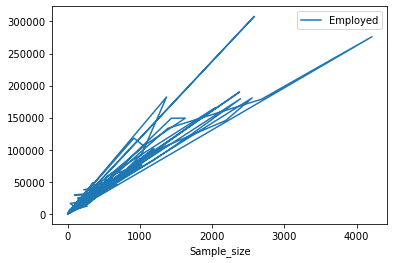

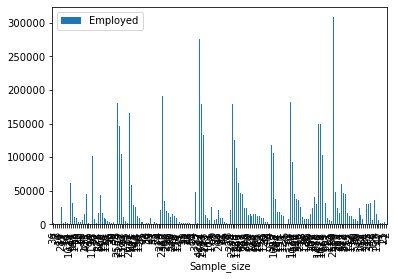

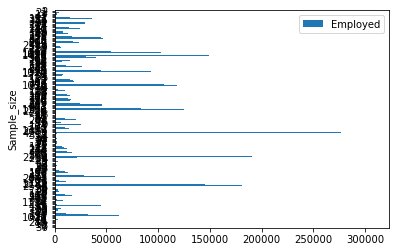

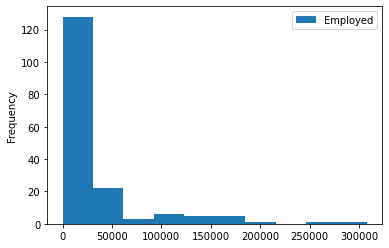

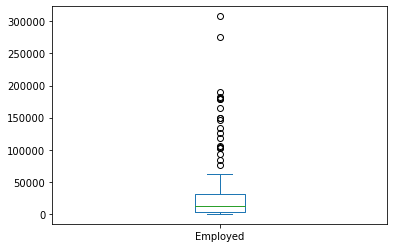

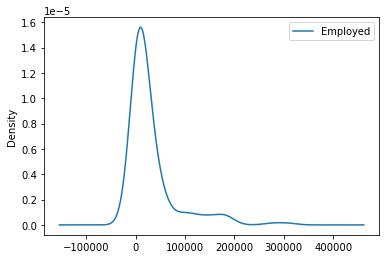

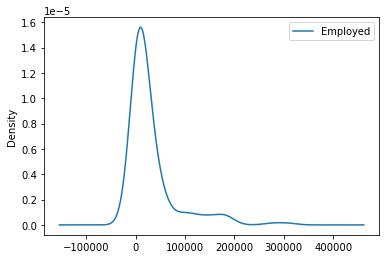

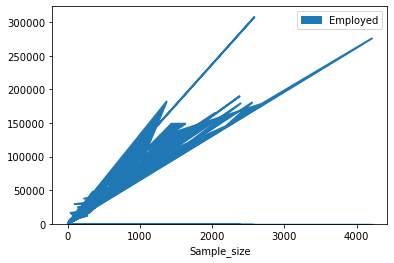

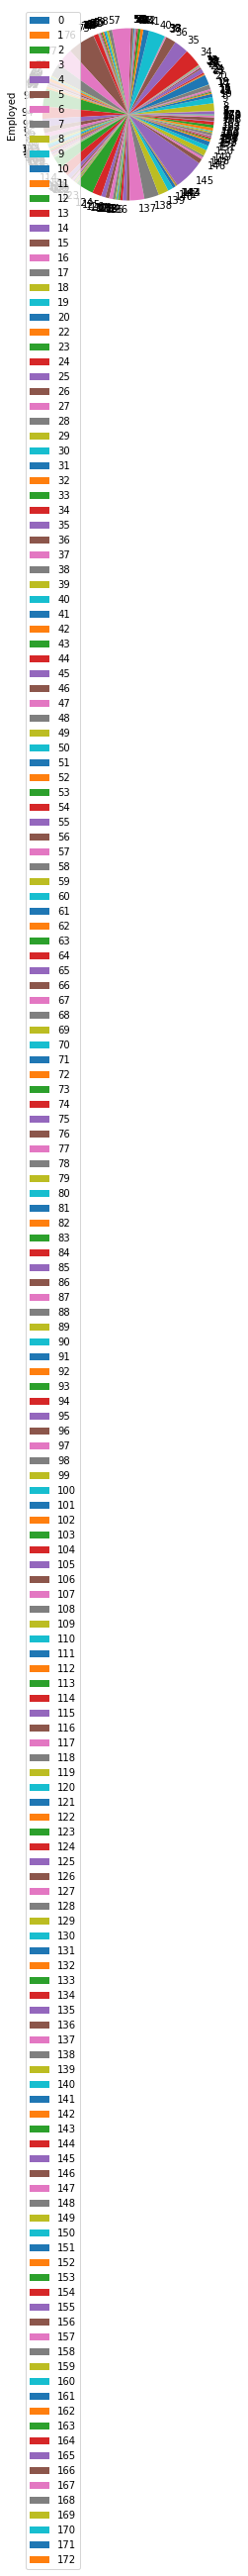

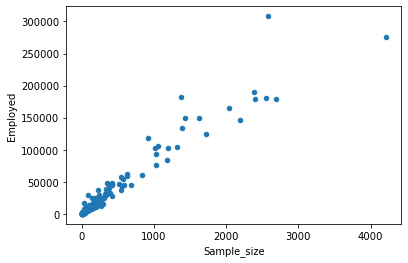

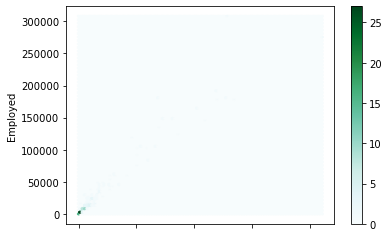

In [10]:
kind_types = ['line', 'bar','barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin']

for i in kind_types:
    recent_grads.plot(x='Sample_size', y='Employed', kind = i )

### Note about using `DataFrame.plot()`

The `DataFrame.plot()` method has a few parameters we can use for tweaking the scatter plot:

- `x =`
- `y =`
- `kind =`
- `title =`
- `figsize =`

But we can instantiate an object and make use of the methods that correspond to that object.

Text(0.5, 1.0, 'Employed vs. Sample_size')

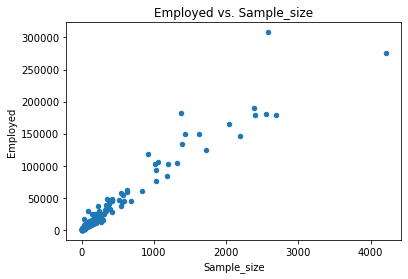

In [11]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

- It can be said that there is a correlation between the measurement of the samples and the number of employees

- To explore the following relations generate a series of scatter plots :

### - `Sample_size` vs. `Median`

- `Sample_size` - Sample size (unweighted) of full-time.

- `Median` - Median salary of full-time, year-round workers.

<AxesSubplot:title={'center':'Sample size of full-time vs. median salary of full-time, year-round workers.'}, xlabel='Sample_size', ylabel='Median'>

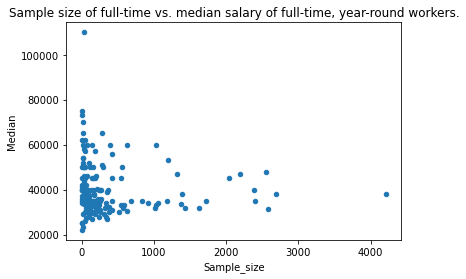

In [12]:
recent_grads.plot(x='Sample_size',
                  y='Median',
                  kind='scatter',

                  title='Sample size of full-time vs. median salary of full-time, year-round workers.')

A small number of full-time samples have the highest range of salaries. on the contrary, when the samples are larger, the salary decreases.

### - `Sample_size` vs. `Unemployment_rate`

- `Sample_size` - Sample size (unweighted) of full-time.

- `Unemployment_rate` - The percentage of the work force that is unemployed at any given date

<AxesSubplot:title={'center':'Sample_size vs. Unemployment_rate'}, xlabel='Sample_size', ylabel='Unemployment_rate'>

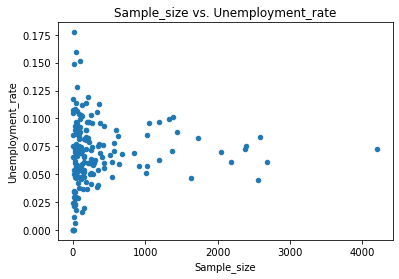

In [13]:
recent_grads.plot(x='Sample_size',
                  y='Unemployment_rate',
                  kind='scatter',
                  title='Sample_size vs. Unemployment_rate')

Similarly when the samples are small the unemployment relationship covers a fairly wide range, however when the size of the full-time samples increases the unemployment ratio is focused on central elements of our graph.


### - Full_time vs. Median

- `Full_time` - Number employed 35 hours or more.

- `Median` - Median salary of full-time, year-round workers.

<AxesSubplot:title={'center':'Full_time vs. Median'}, xlabel='Full_time', ylabel='Median'>

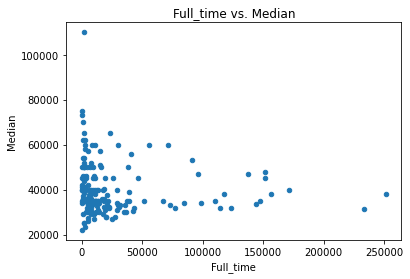

In [14]:
recent_grads.plot(x='Full_time',
                  y='Median',
                  kind='scatter',
                  title='Full_time vs. Median')

This graph explains how a minority of people between 0 and 2500 approximately taking into account that the scale fund with which we are working is 250000, work more than 35 hours and the average salary they have goes from 20000 to 80000 by the way as the number of people who work full time increases the salary has a tendency to decrease.

### - `ShareWomen` vs. `Unemployment_rate`

- `ShareWomen` - Women as share of total.

- `Unemployment_rate` - The percentage of the work force that is unemployed at any given date.

<AxesSubplot:title={'center':'ShareWomen vs. Unemployment_rate'}, xlabel='ShareWomen', ylabel='Unemployment_rate'>

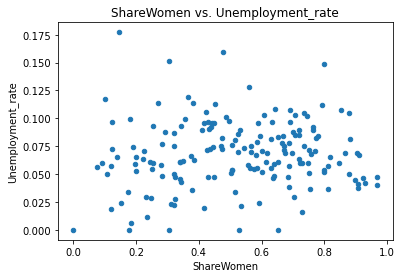

In [15]:
recent_grads.plot(x='ShareWomen',
                  y='Unemployment_rate',
                  kind='scatter',
                  title='ShareWomen vs. Unemployment_rate')

It can be observed that the unemployment relationship among women is distributed in a fairly broad way within this group.

### - `Men` vs. `Median`

- `Men` - Men.

- `Unemployment_rate` Unemployment rate

<AxesSubplot:title={'center':'Men vs. Median'}, xlabel='Men', ylabel='Median'>

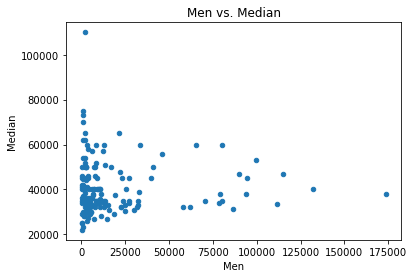

In [16]:
recent_grads.plot(x='Men',
                  y='Median',
                  kind='scatter',

                  title='Men vs. Median')

as we can see there is a large minority of men who earn an average salary of between 20000 and 80000 and that as that number of men increases the salary also decreases


### - `Women` vs `Median`

- `Women` - Women.

- `Median` - Median salary of full-time, year-round workers.

<AxesSubplot:title={'center':'Women vs. Median'}, xlabel='Women', ylabel='Median'>

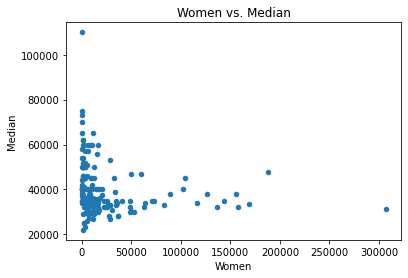

In [17]:
recent_grads.plot(x='Women',
                  y='Median',
                  kind='scatter',
                  title='Women vs. Median')

- the same trend occurs in the graphics of women, however we must bear in mind that the number of women here is greater with respect to the graphics of men and that will affect the visualization of our graphics.


- As a remarkable fact we can say that although the salaries at their top can be equivalent, the differences are found in that the average in men is even higher than in women.


## 2.1 `Matplotlib`, much more detailed plots.


### - 1. Do students in more popular majors make more money?


Because the data that we are going to handle are not categorical, therefore they will be numerical, the ideal in this case is to use a histogram

a histogram is a graph through which it is possible to represent with rectangles distributions of frequencies on determined coordinates. That is, they let us know the frequency of a specific event, thanks to the distribution of information.

A way to do an exploratory analysis and observe the relationships of the data to be analyzed.

Text(0.5, 0, 'Sample_size')

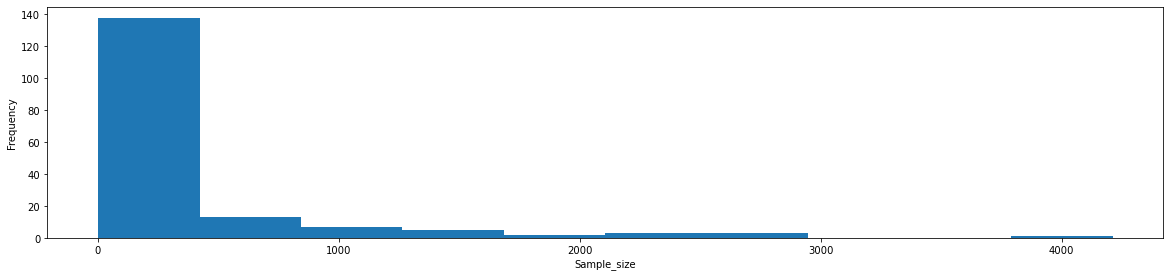

In [18]:
cols = ["Sample_size",
        "Median",
        "Employed",
        "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,40))

r = 0

col_name = cols[r]
ax = fig.add_subplot(len(cols),1,r+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0)
texto = recent_grads[col_name]
ax.set_xlabel(col_name, rotation = 0) 

the histogram informs us that the highest frequency of our full-time sample size set is the samples with a low value.

Text(0.5, 0, 'Median')

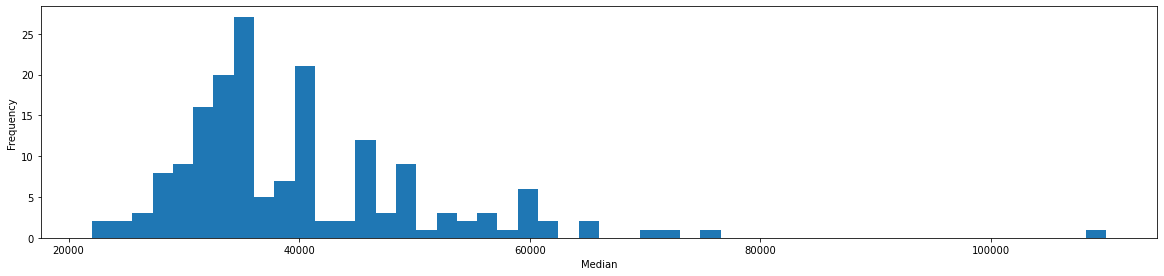

In [19]:
cols = ["Sample_size",
        "Median",
        "Employed",
        "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,40))

r = 1

col_name = cols[r]
ax = fig.add_subplot(len(cols),1,r+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)
texto = recent_grads[col_name]
ax.set_xlabel(col_name, rotation = 0) 

In this case we see that the amount that is repeated more times (the frequency) of `Median` salary of full-time, year-round workers. is around 3000o dollars approximately, therefore **students in more popular majors make more money**.

Text(0.5, 0, 'Employed')

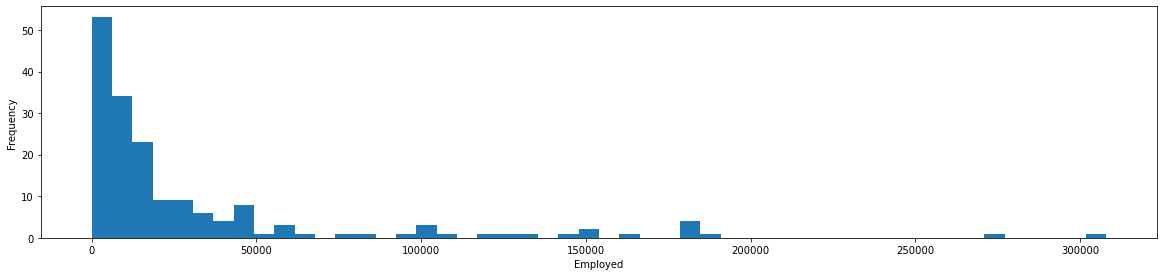

In [20]:
cols = ["Sample_size",
        "Median",
        "Employed",
        "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,40))

r = 2

col_name = cols[r]
ax = fig.add_subplot(len(cols),1,r+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)
texto = recent_grads[col_name]
ax.set_xlabel(col_name, rotation = 0) 

In a skewed distribution, we see the following:

- In the case of the casual histogram, the values pile up toward the starting point of the range.

- Values decrease in frequency towards the opposite end, forming the **tail of the distribution**.

- Therefore the higher frequency of number of `Employed` is quite low.

Text(0.5, 0, 'Full_time')

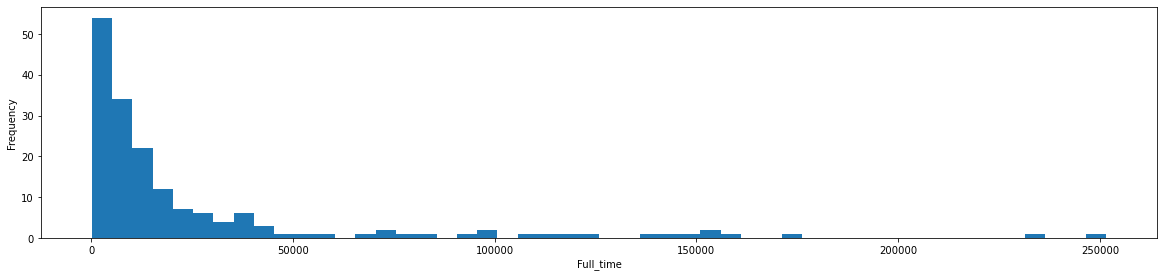

In [21]:
cols = ["Sample_size",
        "Median",
        "Employed",
        "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,40))

r = 3

col_name = cols[r]
ax = fig.add_subplot(len(cols),1,r+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)
texto = recent_grads[col_name]
ax.set_xlabel(col_name, rotation = 0) 

The same goes for full-time jobs, the pattern of the graph above is repeated.

Text(0.5, 0, 'ShareWomen')

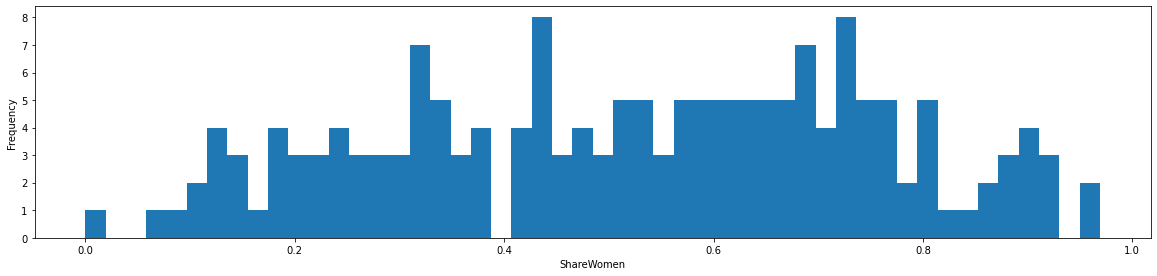

In [22]:
cols = ["Sample_size",
        "Median",
        "Employed",
        "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,40))

r = 4

col_name = cols[r]
ax = fig.add_subplot(len(cols),1,r+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)
texto = recent_grads[col_name]
ax.set_xlabel(col_name, rotation = 0) 

We can see that `ShareWomen` distribution is homogeneous in the dataset.

Text(0.5, 0, 'Unemployment_rate')

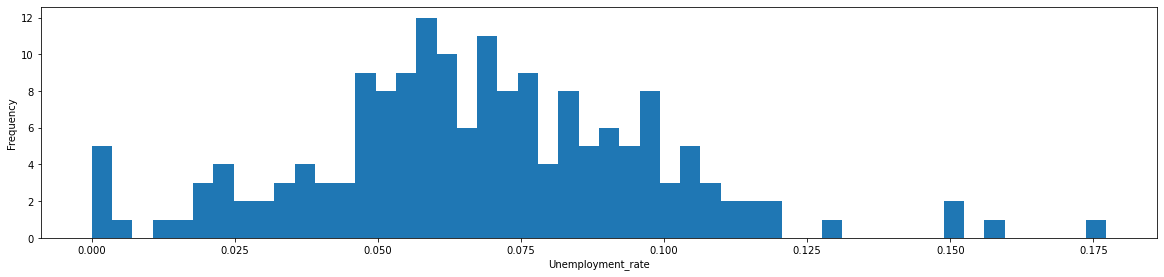

In [23]:
cols = ["Sample_size",
        "Median",
        "Employed",
        "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,40))

r = 5

col_name = cols[r]
ax = fig.add_subplot(len(cols),1,r+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)
texto = recent_grads[col_name]
ax.set_xlabel(col_name, rotation = 0) 

The `unemployment_rate` can be said to be low since the values on the **x-axis** are low and the distribution covers a fairly small portion.

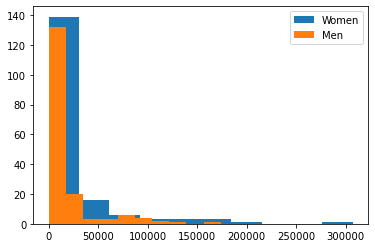

In [24]:
plt.hist(recent_grads['Women'], label= "Women")
plt.hist(recent_grads['Men'], label= "Men")

plt.legend()
plt.show()

Through the superposition of graphs we can observe that the total amount and frequency is greater for women.

In the graphs in which we compared the average salary between the two genders this we already saw in the x axis.

## - 2. How many majors are predominantly male? 

The `Mayors` category type the most advisable thing would be to work instead of scatter plots with bar plots.

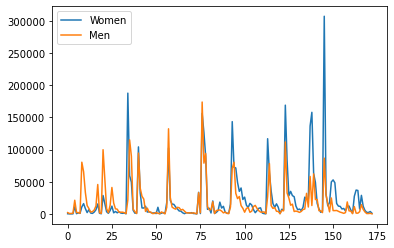

In [25]:
plt.plot(recent_grads['Women'], label= "Women")
plt.plot(recent_grads['Men'], label= "Men")

plt.legend()
plt.show()

Quickly we observe that **women surpass men** and that these are more focused on fields other than men.

In [26]:
max_value = recent_grads["Men"].max() 
max_value # max number of Men.

173809.0

In [27]:
max_men_value_bool = recent_grads["Men"] == max_value
max_men_value_bool.unique()

array([False,  True])

In [28]:
M_final_col = ["Major_category"]
M_final_col

['Major_category']

Through Boolean filtering we obtain which is the most chosen career category

In [29]:
result = recent_grads.loc[max_men_value_bool,M_final_col]
result

,Major_category
76,Business


## ... and majors predominantly female?

In [30]:
max_value = recent_grads["Women"].max() 
max_value

307087.0

In [31]:
max_value_bool = recent_grads["Women"] == max_value
max_value_bool.unique()

array([False,  True])

In [32]:
W_final_col = ["Major_category"]
W_final_col

['Major_category']

In [33]:
result = recent_grads.loc[max_value_bool,W_final_col]
result

,Major_category
145,Psychology & Social Work


##### In this table we can see the relationship of bachelor's degrees by gender and the number of people who are in them.

|Genre|Mayor category|# people|
|:--|:--|:--|
|Men|Business|173809.0|
|Women|Psychology & Social Work|307087.0|

The number of **women is almost double** the number of men who are studying.

## Plots using `matplolib` by type of major and gender.

- This is a representation that came to mind from the types of running and through the use of Boolean filters.

In [34]:
carreras = recent_grads['Major_category'].unique()
carreras

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

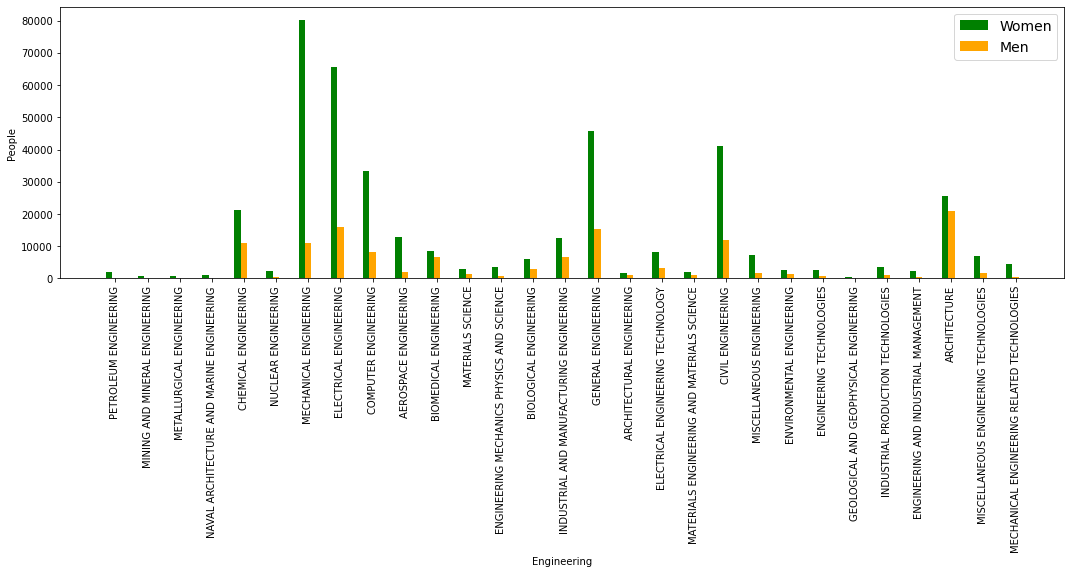

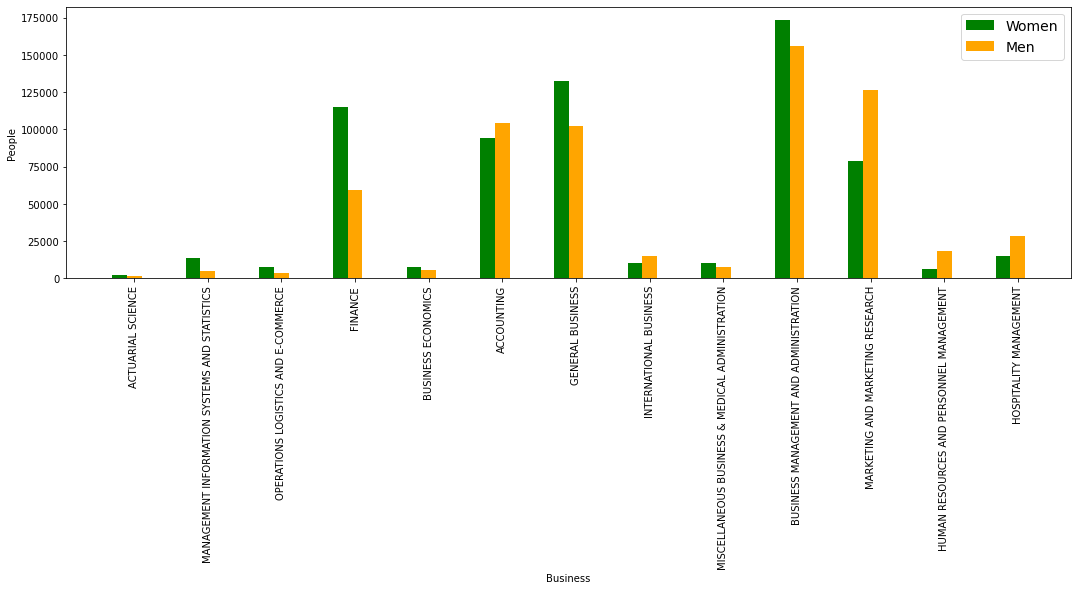

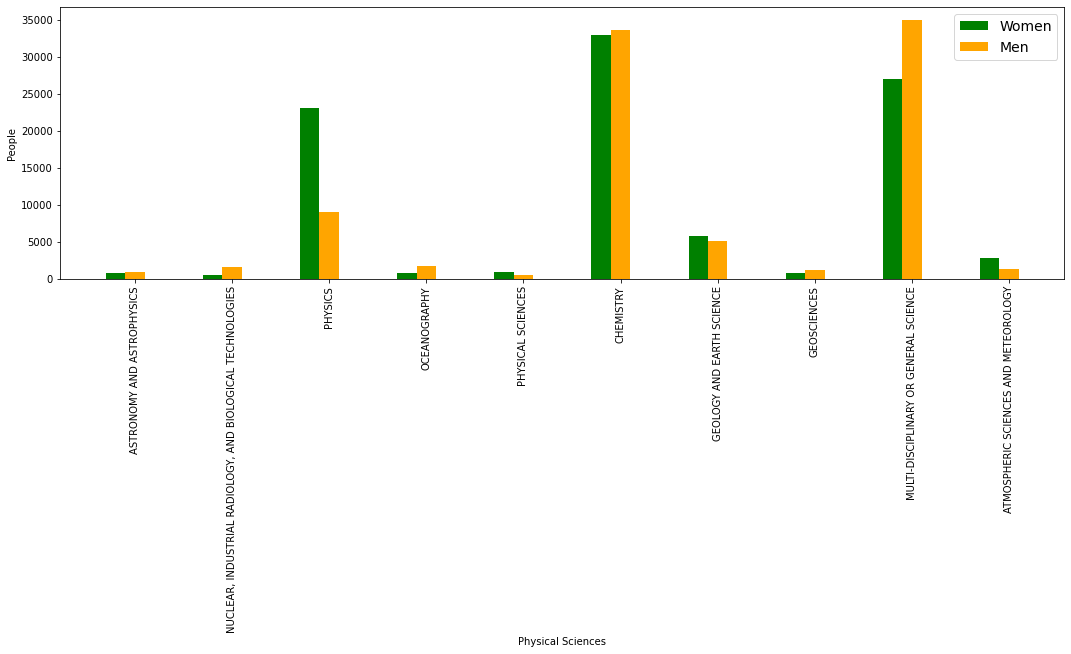

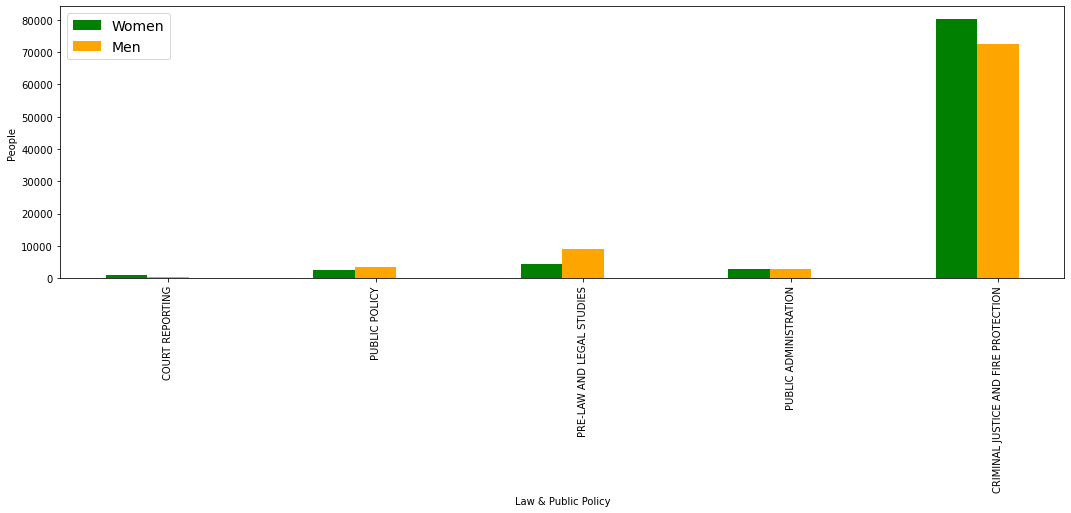

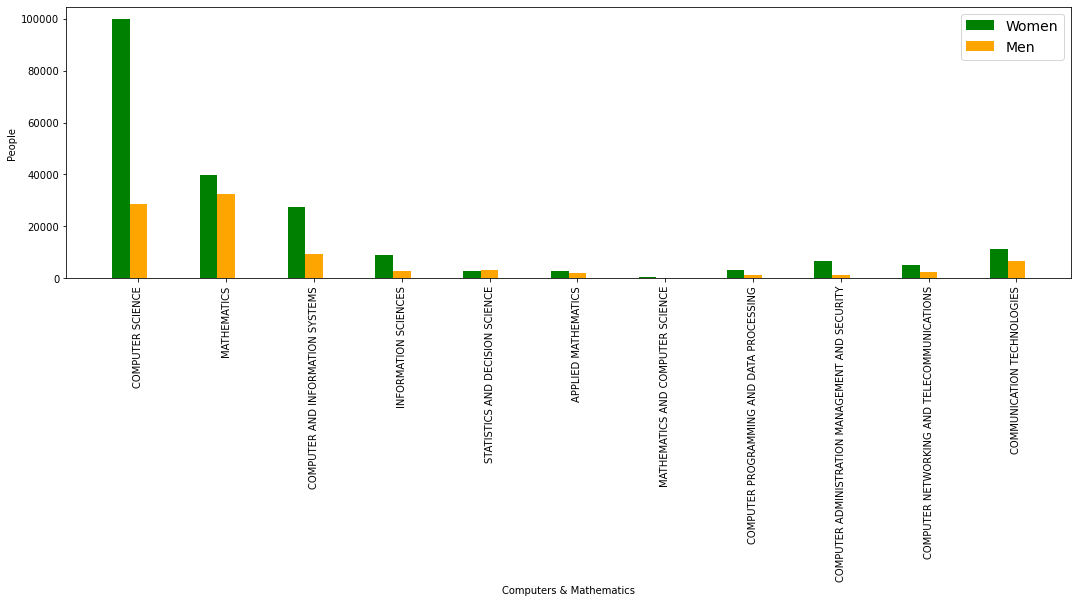

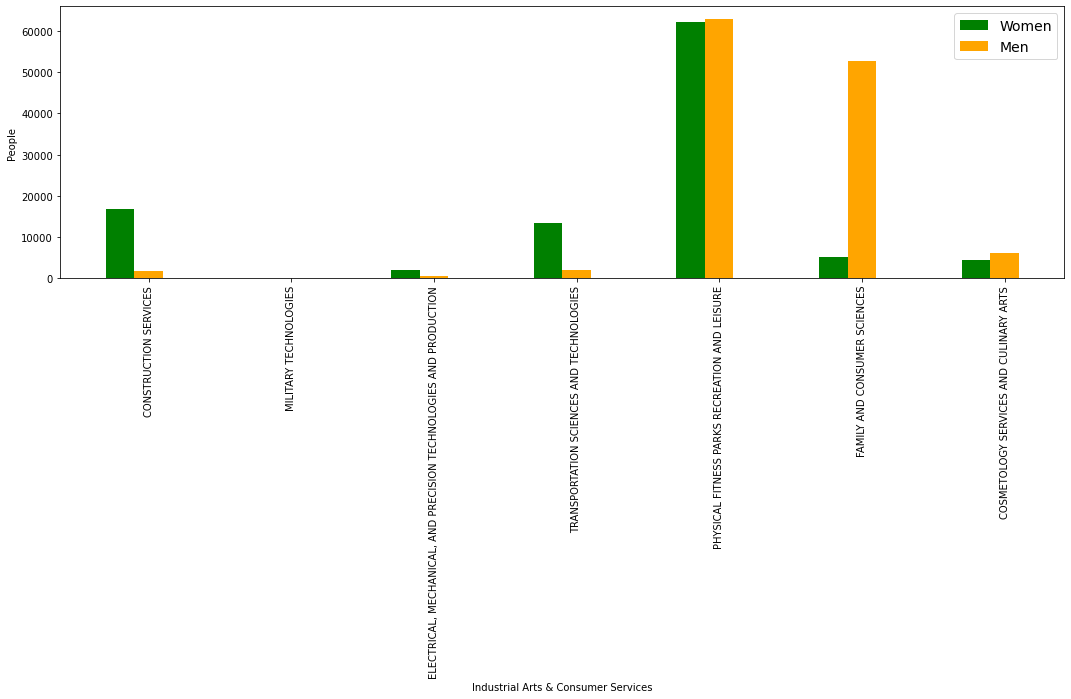

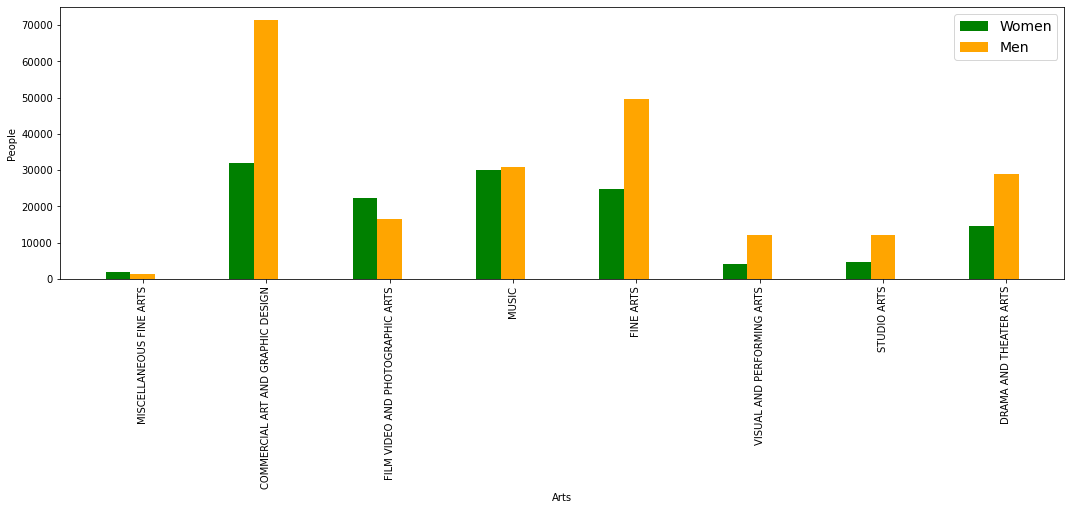

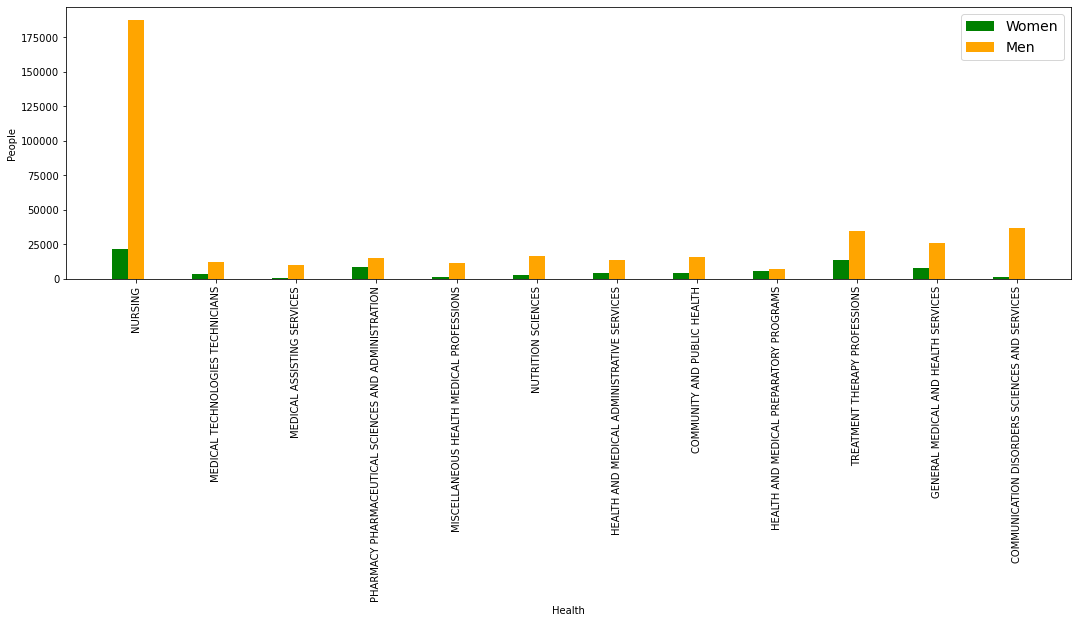

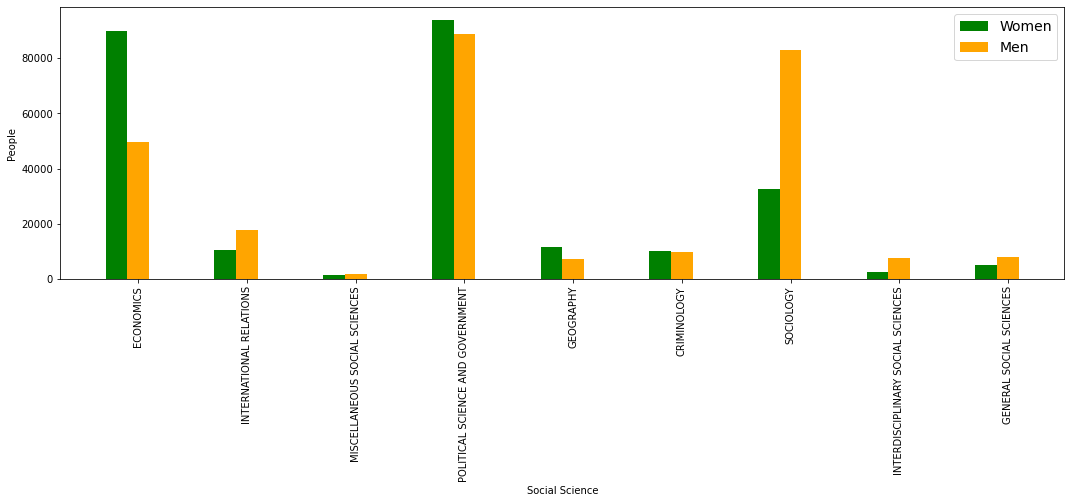

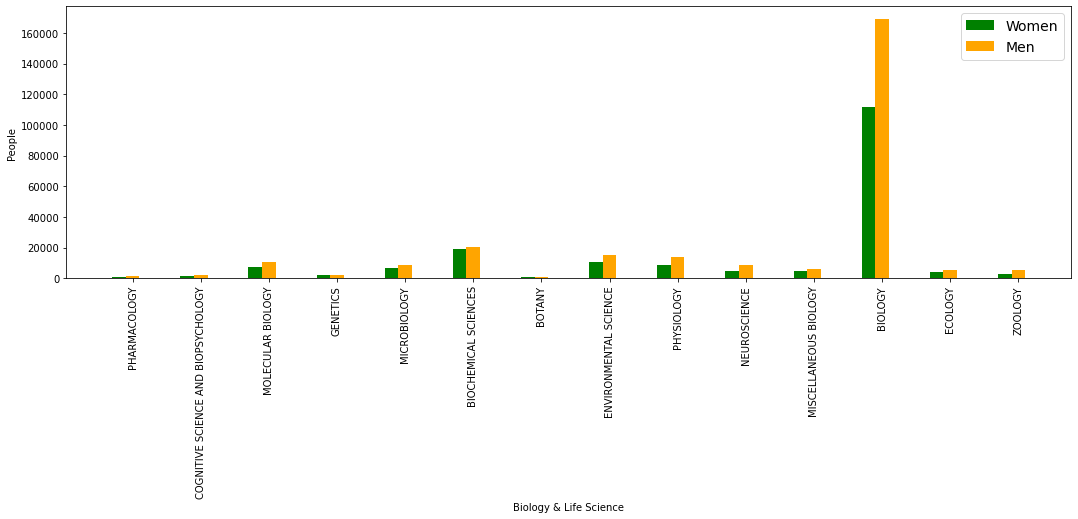

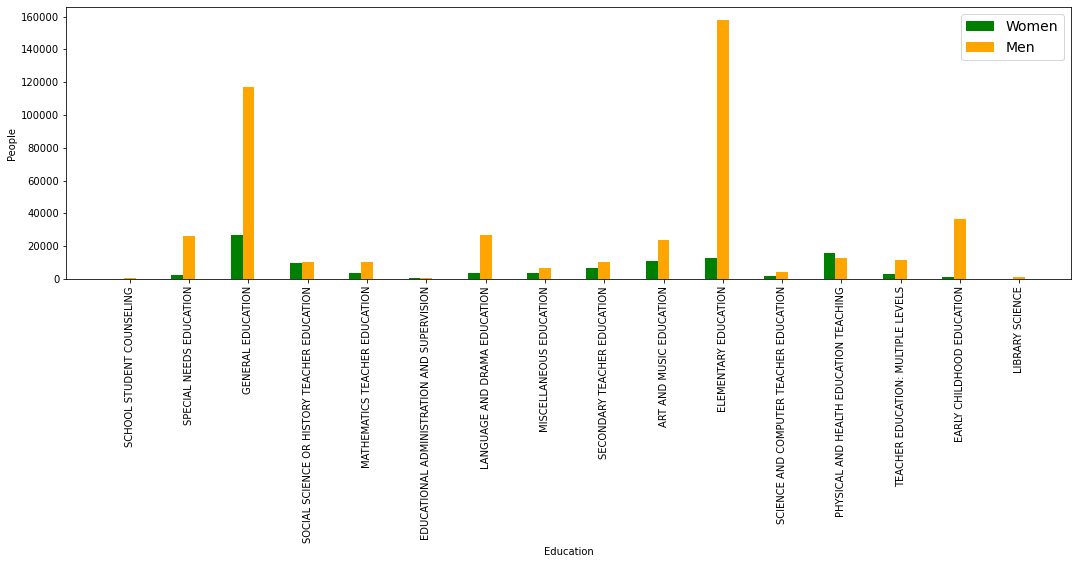

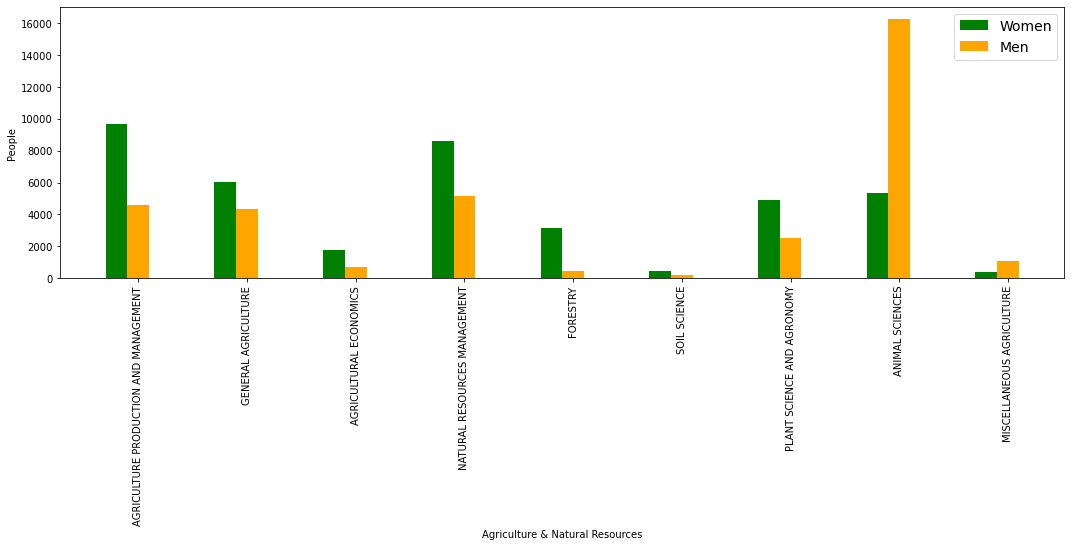

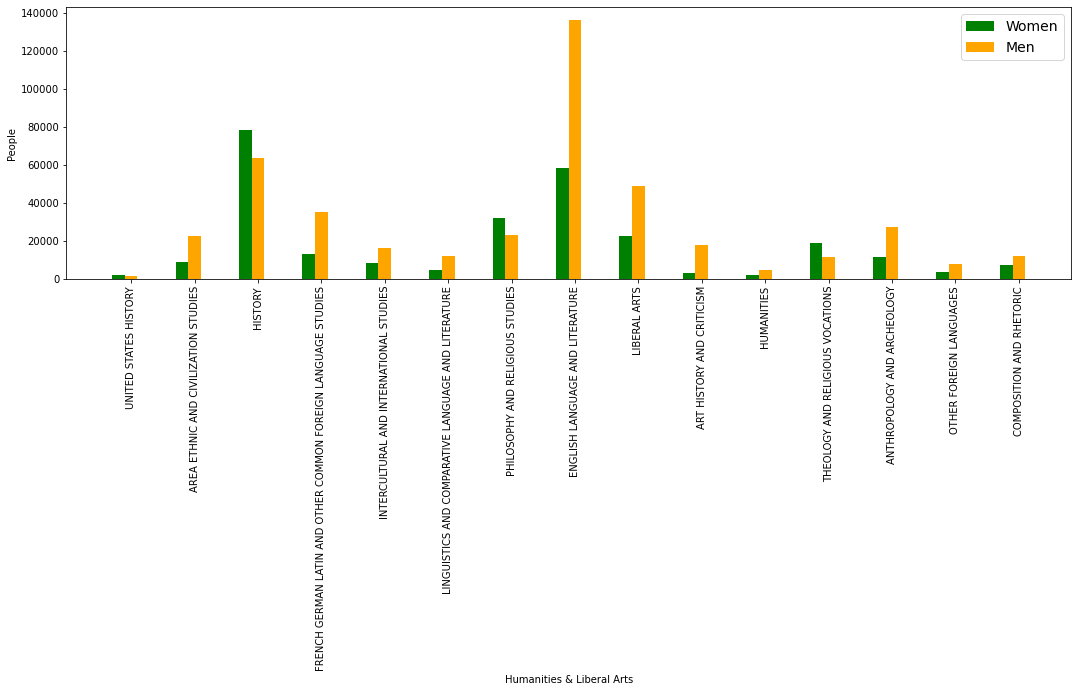

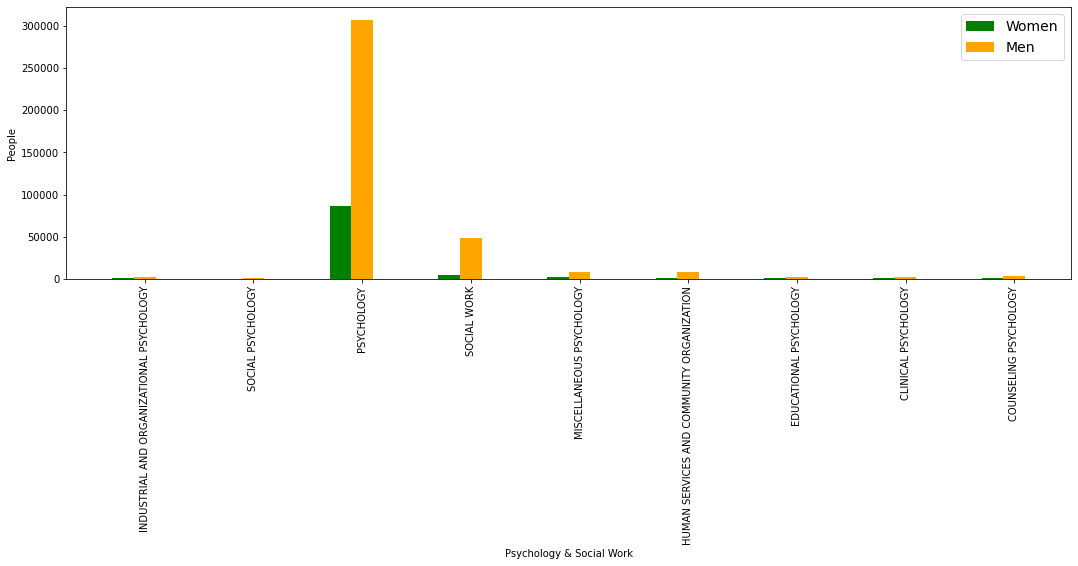

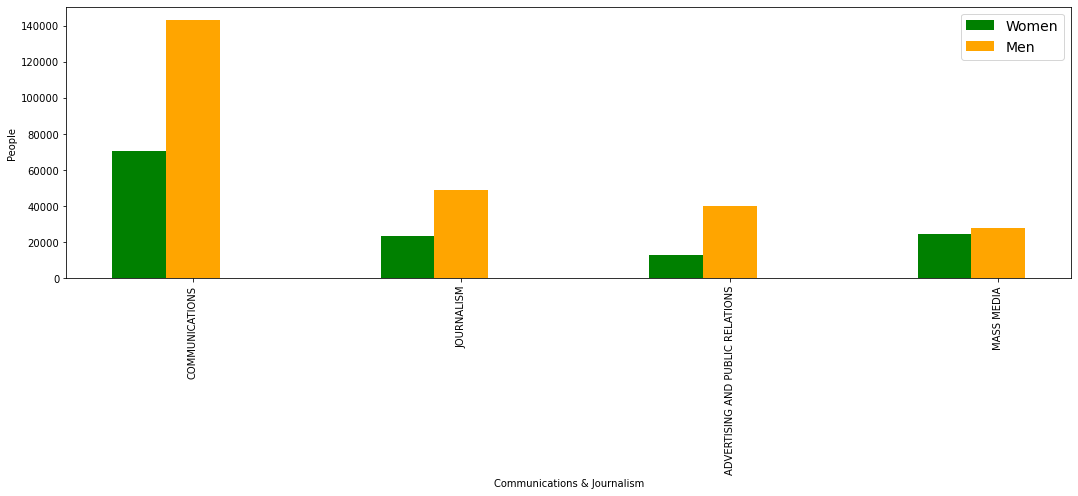

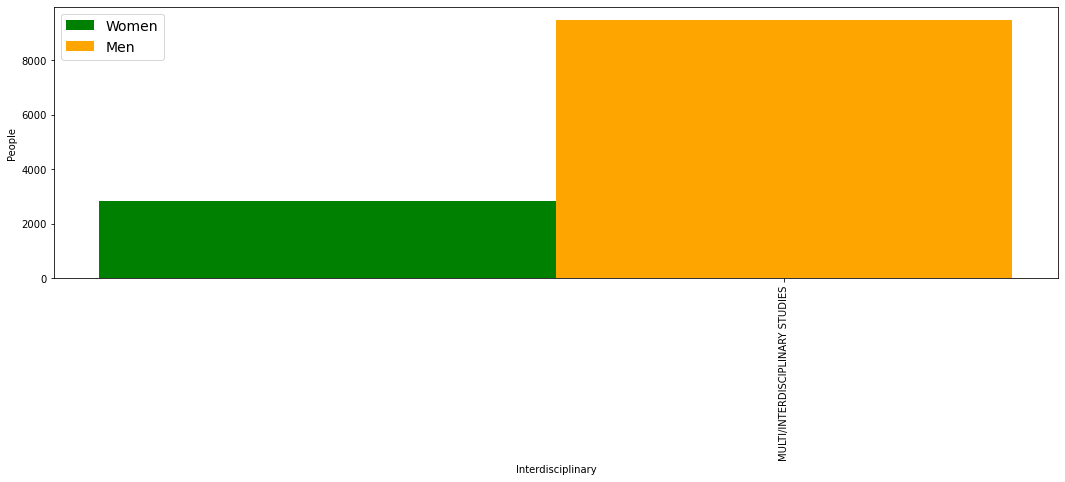

In [35]:
# create data

for carrera in range(len(carreras)): # get len
    
    serie_bool = recent_grads["Major_category"] == carreras[carrera]
    
    f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
    
    y1 = list(recent_grads.loc[serie_bool,"Men"])
    y2 = list(recent_grads.loc[serie_bool,"Women"])

    texto = recent_grads.loc[serie_bool,"Major"] 
    x = np.arange(len(texto))

    width = 0.2

    # plot data in grouped manner of bar type
    plt.bar(x-0.2, y1, width, color='green')
    plt.bar(x, y2, width, color='orange')

    plt.xticks(x, recent_grads.loc[serie_bool,"Major"], rotation = 90)
    plt.xlabel(carreras[carrera])
    plt.ylabel("People")
    plt.legend(['Women', 'Men'], fontsize = 14)
    plt.show()

## `Pandas` Scatter matrix:

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named `scatter_matrix()` that generates the plots for us.

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

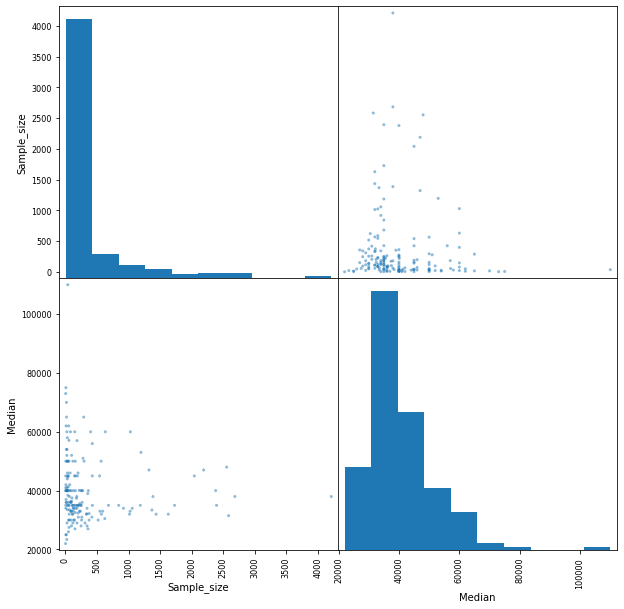

In [36]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

This way of graphing allows us:

- See e through histograms the distribution 

- through the scatter plot if there is or does not exist correlation between the data.

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

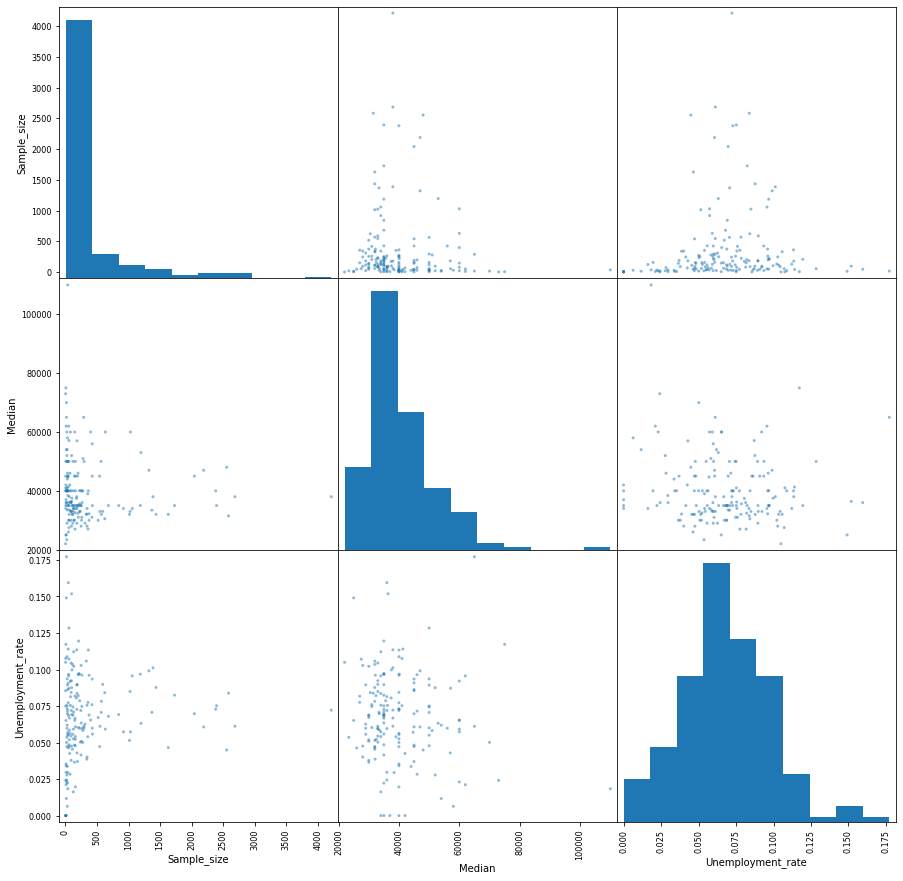

In [37]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15))

Here we can see the distribution of:

- `Sample_size` - Sample size (unweighted) of full-time.

- `Median` - Median salary of full-time, year-round workers.

- `Unemployment_rate` - Percentage of the work force that is unemployed at any given date


and also the performance ratio while observing the type of correlation that exists between the three sets.

## Bar Plots:

<AxesSubplot:>

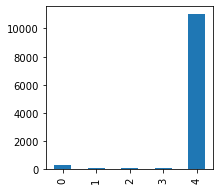

In [38]:
recent_grads[:5]['Women'].plot(kind='bar', figsize=(3,3))

As an exploration we can make use of the following technique:

- In this way we can visualize in a bar graph and in a very fast way the relationships between the sets that we want to observe, determining the number of items to explore.

<AxesSubplot:xlabel='Major'>

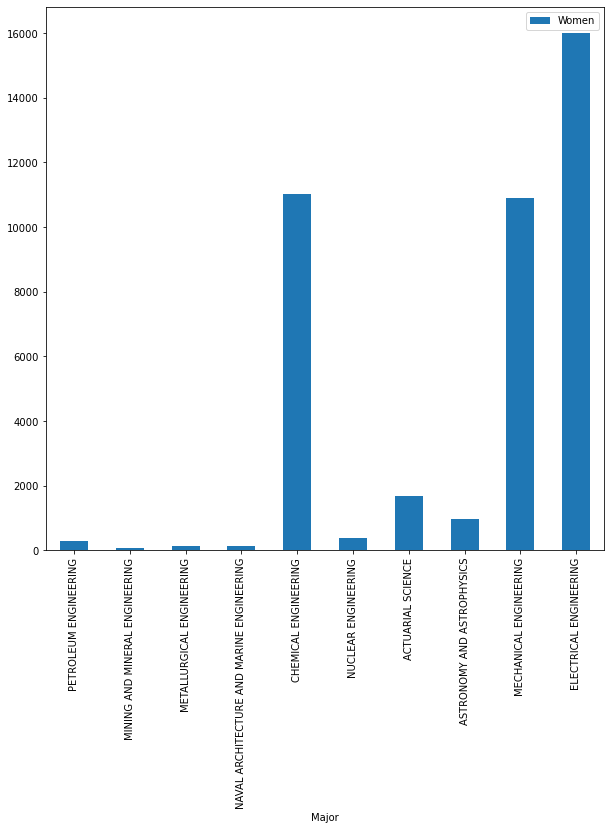

In [39]:
recent_grads[:10].plot.bar(x='Major', y='Women', figsize=(10,10))

These graphs **only represent the first 10 values** of the relationship we have established.

<AxesSubplot:xlabel='Major'>

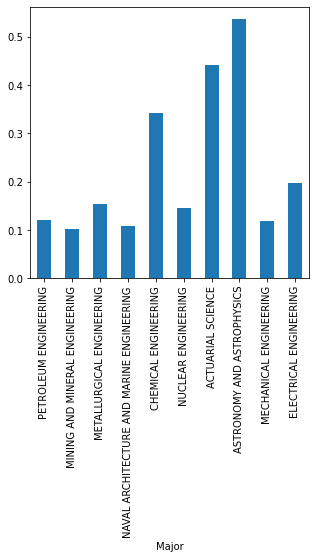

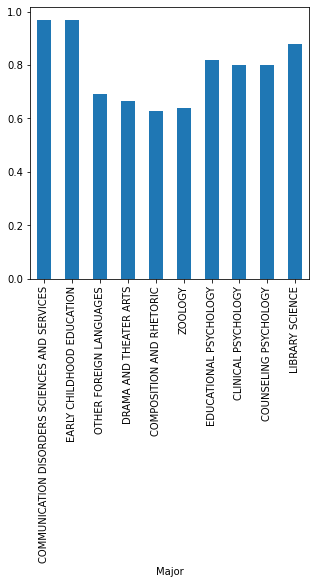

In [40]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False, figsize=(5,5))
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False, figsize=(5,5))

The same happens in these graphic representations where the first ten rows and the last 10 are shown.

<AxesSubplot:xlabel='Unemployment_rate'>

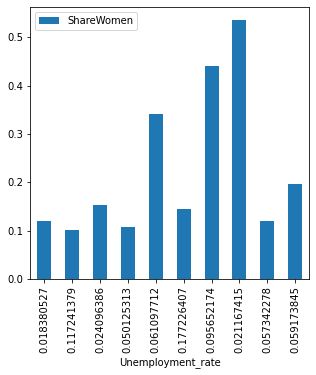

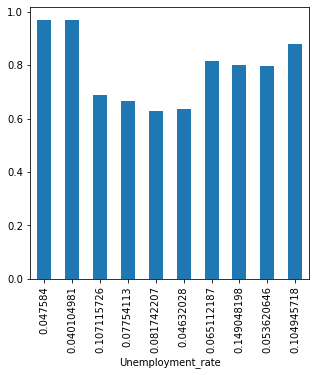

In [41]:
recent_grads[:10].plot.bar(x='Unemployment_rate', y='ShareWomen', legend=True, figsize=(5,5))
recent_grads[-10:].plot.bar(x='Unemployment_rate', y='ShareWomen', legend=False, figsize=(5,5))

## Hexbin Plot

This specific charting technique is useful for visualizing:

- distributions

- distances

- clusters

- density functions.

Hexbin charts consist of points that look like hexagon shapes. Hexbin works well with binned datasets.

Hexbin is a great alternative to Hist2d plots. And although they are different types of charts hexbin can be an alternative to scatter plots as well when suitable.

**Hexagon is a histogram** like chart where **each hexagon represents the density of samples** (instead of bars in histogram).

It **can be an alternative to histogram visualization** but thanks to its elaborate use of x and y axes **it can also be used as an alternative to scatter plots if data is suitable**.

In the hexbin chart above with the points of the scatter plot overlaid you can see how outer hexagons correspond to less sample density (1 or 2 points) while as we go through inner hexagons point density is much higher. This image captures the idea of hexbin charts very as well as their inner workings well.

You can create similar charts just by using hexbin and scatter consecutively.

<AxesSubplot:xlabel='ShareWomen', ylabel='Men'>

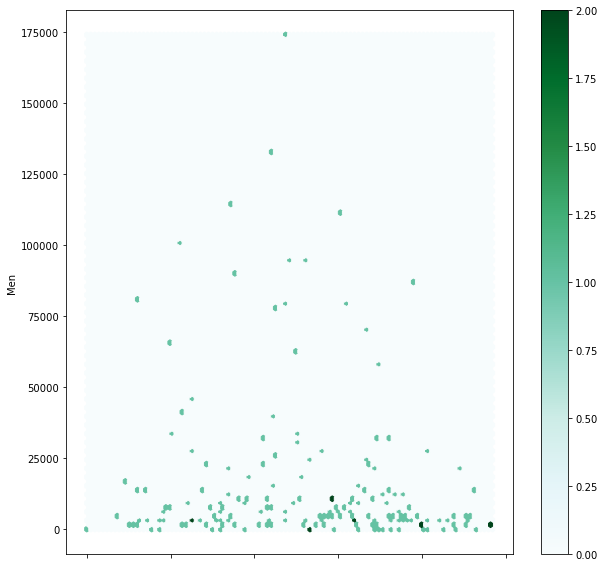

In [42]:
recent_grads.plot(x='ShareWomen', y='Men', kind = 'hexbin', figsize=(10,10) )

## Conclusions: 

The representation of information is vital and in this project it has been seen how depending on the degree of **depth you want to reach and the data type you want to explain**.

You might use a library `pandas` immediate as we have seen or `matplotlib` where the detail is greater and that is reflected in the particularities offered in the code.